In [156]:
import ROOT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 12})

In [157]:
def plotTEfficency(tefficency, ax, **errorbar_kwargs):
    th1 = tefficency.GetTotalHistogram()
    
    bins = [ i for i in range(th1.GetNbinsX()) if th1.GetBinContent(i) > 0.0 ]
    
    x = [ th1.GetBinCenter(i) for i in bins ]

    x_lo = [ th1.GetBinLowEdge(i) for i in bins ]
    x_width = [ th1.GetBinWidth(i) for i in bins ]
    x_hi = np.add(x_lo, x_width)
    x_err_lo = np.subtract(x, x_lo)
    x_err_hi = np.subtract(x_hi, x)

    y = [ tefficency.GetEfficiency(i) for i in bins ]
    y_err_lo = [ tefficency.GetEfficiencyErrorLow(i) for i in bins ]
    y_err_hi = [ tefficency.GetEfficiencyErrorUp(i) for i in bins ]

    ax.errorbar(x, y, yerr=(y_err_lo, y_err_hi), xerr=(x_err_lo, x_err_hi), **errorbar_kwargs)
    return ax

In [164]:
def show_performance_in_df(performance, label="value", df=None):
    if df is None:
        keys = ["eff_tracks", "fakerate_tracks", "duplicaterate_tracks", "eff_particles", "fakerate_particles", "duplicaterate_particles"]
        df = pd.DataFrame({"key": keys})
    else:
        keys = df["key"]
        
    df[label] = [ performance.Get(key)[0] for key in keys ]
    return df
    #print(df.to_string(formatters={"value": "{:.2%}".format}))

In [177]:
performance_ckf_only_fatras = ROOT.TFile.Open("../output_n10_fatras/performance_ckf.root")
performance_kf_plus_cf_fatras = ROOT.TFile.Open("../output_n10_fatras/performance_kf_plus_ckf.root")

In [178]:
df = show_performance_in_df(performance_ckf_only_fatras, "CKF only")
df = show_performance_in_df(performance_kf_plus_cf_fatras, "KF+CKF", df)
df

,key,CKF only,KF+CKF
0,eff_tracks,0.675649,0.885455
1,fakerate_tracks,0.123386,0.036710
2,duplicaterate_tracks,0.391823,0.209794
3,eff_particles,0.471278,0.577060
4,fakerate_particles,0.133078,0.026276
5,duplicaterate_particles,0.262189,0.112809


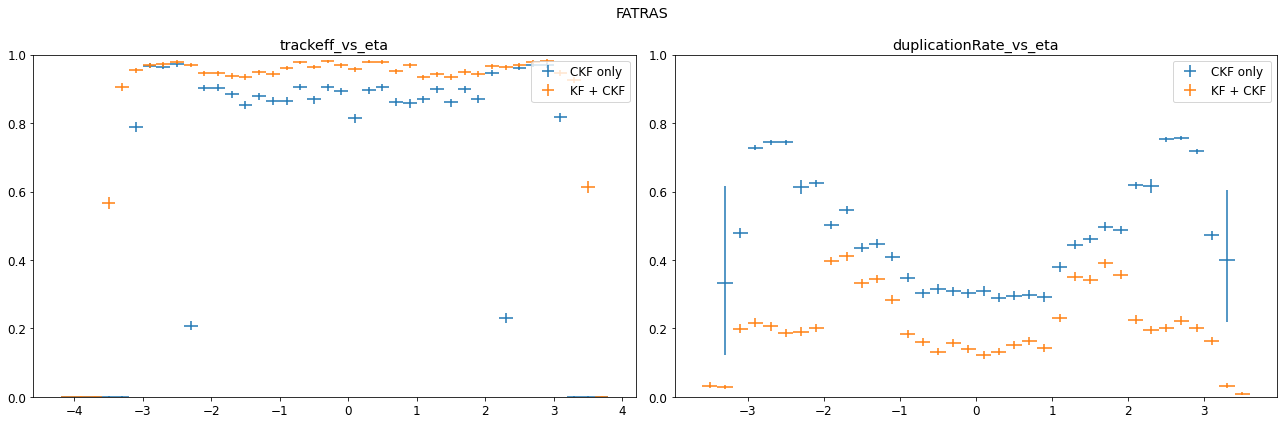

In [179]:
fig, axes = plt.subplots(1,2,figsize=(18,6))

for ax, key in zip(axes, ['trackeff_vs_eta', 'duplicationRate_vs_eta']):
    plotTEfficency(performance_ckf_only_fatras.Get(key), ax, fmt="none", color="tab:blue", label="CKF only")
    plotTEfficency(performance_kf_plus_cf_fatras.Get(key), ax, fmt="none", color="tab:orange", label="KF + CKF")
    ax.set_title(key)
    ax.set_ylim(0,1)
    ax.legend()

fig.suptitle("FATRAS")
fig.tight_layout()

In [180]:
performance_ckf_only_geant = ROOT.TFile.Open("../output_n10_geant/performance_ckf.root")
performance_kf_plus_cf_geant = ROOT.TFile.Open("../output_n10_geant/performance_kf_plus_ckf.root")

In [181]:
df = show_performance_in_df(performance_ckf_only_geant, "CKF only")
df = show_performance_in_df(performance_kf_plus_cf_geant, "KF+CKF", df)
df

,key,CKF only,KF+CKF
0,eff_tracks,0.251844,0.652765
1,fakerate_tracks,0.144630,0.039825
2,duplicaterate_tracks,0.196109,0.309396
3,eff_particles,0.474602,0.683541
4,fakerate_particles,0.351320,0.045778
5,duplicaterate_particles,0.301893,0.206744


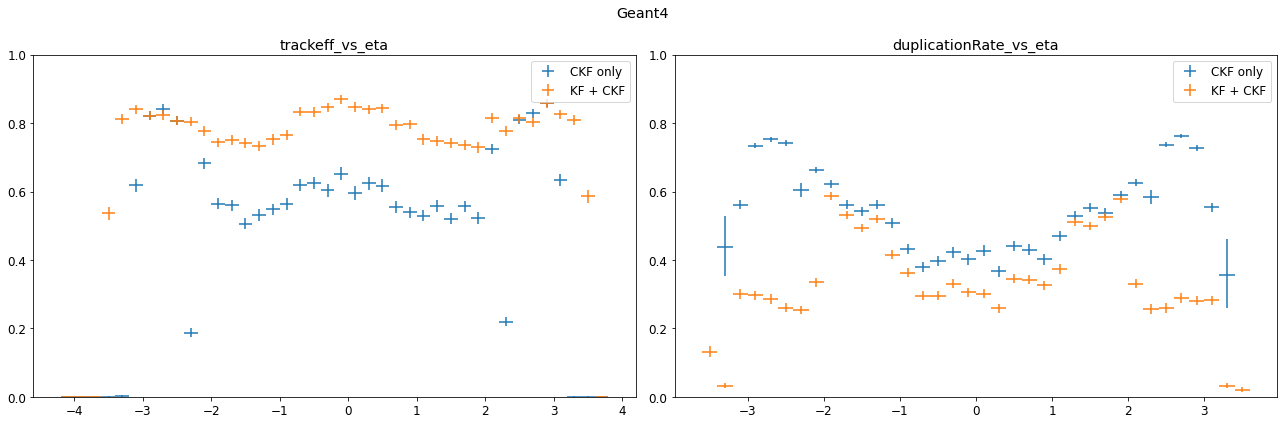

In [182]:
fig, axes = plt.subplots(1,2,figsize=(18,6))

for ax, key in zip(axes, ['trackeff_vs_eta', 'duplicationRate_vs_eta']):
    plotTEfficency(performance_ckf_only_geant.Get(key), ax, fmt="none", color="tab:blue", label="CKF only")
    plotTEfficency(performance_kf_plus_cf_geant.Get(key), ax, fmt="none", color="tab:orange", label="KF + CKF")
    ax.set_title(key)
    ax.set_ylim(0,1)
    ax.legend()

fig.suptitle("Geant4")
fig.tight_layout()